In [7]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np

In [28]:
def get_data(track_id):
    url = f'https://kworb.net/spotify/track/{track_id}.html'
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for errors
    except requests.exceptions.HTTPError as e:
        print(f"HTTPError for track ID {track_id}: {e}")
        return []  # Return an empty list for this track ID

    html_content = response.text

    # Parse the HTML with BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Step 1: Find the header row to locate the "VN" and "Global" column indices
    header_row = soup.find('tr')  # First row contains the headers
    headers = header_row.find_all('th')
    vn_index = None
    global_index = None
    for idx, header in enumerate(headers):
        if header.text.strip() == 'VN':
            vn_index = idx
        if header.text.strip() == 'Global':
            global_index = idx

    if vn_index is None and global_index is None:
        print(f"Could not find the 'VN' or 'Global' columns in the table for track ID {track_id}.")
        return []

    # Step 2: Extract all rows after the header
    rows = soup.find_all('tr')[1:]  # Skip the header row

    # Step 3: Loop through each row and extract the VN and Global column data
    data = []
    for row in rows:
        cells = row.find_all('td')
        if not cells:  # Skip rows with no <td> elements
            continue

        # Get the date (first column)
        date_cell = cells[0]
        date = date_cell.text.strip()

        # Initialize VN and Global data
        vn_position = None
        vn_stream_count = None
        global_position = None
        global_stream_count = None

        # Extract VN data if the column exists
        if vn_index is not None and len(cells) > vn_index:
            vn_cell = cells[vn_index]
            if vn_cell.text.strip() != '--':
                span_p = vn_cell.find('span', class_='p')
                span_s = vn_cell.find('span', class_='s')
                if span_p:
                    vn_position = int(span_p.text.replace(',', ''))
                if span_s:
                    vn_stream_count = int(span_s.text.replace(',', ''))
                else:
                    vn_stream_count = int(vn_cell.text.replace(',', ''))

        # Extract Global data if the column exists
        if global_index is not None and len(cells) > global_index:
            global_cell = cells[global_index]
            if global_cell.text.strip() != '--':
                span_p = global_cell.find('span', class_='p')
                span_s = global_cell.find('span', class_='s')
                if span_p:
                    global_position = int(span_p.text.replace(',', ''))
                if span_s:
                    global_stream_count = int(span_s.text.replace(',', ''))
                else:
                    global_stream_count = int(global_cell.text.replace(',', ''))

        # Store the data as a tuple
        data.append((track_id, date, vn_position, vn_stream_count, global_position, global_stream_count))

    return data

In [ ]:
songs = pd.read_csv('vietnamese_songs_full.csv')
ids = songs['id']
data = []
for i in ids:
    data += get_data(i)


HTTPError for track ID 0ReId5SRMspb6ISw0rBsBN: 404 Client Error: Not Found for url: https://kworb.net/spotify/track/0ReId5SRMspb6ISw0rBsBN.html
HTTPError for track ID 72IwoG8tqvIWV10IHjpNNA: 404 Client Error: Not Found for url: https://kworb.net/spotify/track/72IwoG8tqvIWV10IHjpNNA.html
Could not find the 'VN' or 'Global' columns in the table for track ID 3USxtqRwSYz57Ewm6wWRMp.
HTTPError for track ID 0JKGe340YJwfDrpXqPQ8sw: 404 Client Error: Not Found for url: https://kworb.net/spotify/track/0JKGe340YJwfDrpXqPQ8sw.html
HTTPError for track ID 6aaNsCMWPBaUuJE1grH6Po: 404 Client Error: Not Found for url: https://kworb.net/spotify/track/6aaNsCMWPBaUuJE1grH6Po.html
HTTPError for track ID 5QDLhrAOJJdNAmCTJ8xMyW: 404 Client Error: Not Found for url: https://kworb.net/spotify/track/5QDLhrAOJJdNAmCTJ8xMyW.html
HTTPError for track ID 7DnAm9FOTWE3cUvso43HhI: 404 Client Error: Not Found for url: https://kworb.net/spotify/track/7DnAm9FOTWE3cUvso43HhI.html
HTTPError for track ID 34zLev2Poav7NqDi6zW

ValueError: 4 columns passed, passed data had 6 columns

In [30]:
df = pd.DataFrame(data, columns=['id', 'date', 'vn_position', 'vn_stream_count', 'global_position', 'global_stream_count'])
df = df.replace('--', np.nan)
df.to_csv('position_streams_by_time_data.csv', index=False)

In [31]:
df['id'].nunique()

1624

In [35]:
df

,id,date,vn_position,vn_stream_count,global_position,global_stream_count
0,7LVrrX8pkzI9fMF88nGabt,Total,NaN,34177750.0,NaN,NaN
1,7LVrrX8pkzI9fMF88nGabt,Peak,3.0,627702.0,NaN,NaN
2,7LVrrX8pkzI9fMF88nGabt,2020/12/24,3.0,306472.0,NaN,NaN
3,7LVrrX8pkzI9fMF88nGabt,2020/12/31,3.0,329021.0,NaN,NaN
4,7LVrrX8pkzI9fMF88nGabt,2021/01/07,3.0,280938.0,NaN,NaN
...,...,...,...,...,...,...
158824,4CrTXVuKQnFlIoscIDgMCq,2023/09/08,97.0,20016.0,NaN,NaN
158825,4CrTXVuKQnFlIoscIDgMCq,2023/09/09,115.0,17002.0,NaN,NaN
158826,4CrTXVuKQnFlIoscIDgMCq,2023/09/10,134.0,17121.0,NaN,NaN
158827,4CrTXVuKQnFlIoscIDgMCq,2023/09/11,154.0,15343.0,NaN,NaN


In [46]:
df = pd.read_csv('position_streams_by_time_data.csv')

In [50]:
df = df.drop_duplicates()

In [51]:
def split_weekly_daily(df):
    weekly_data = []
    daily_data = []
    
    # Group by track ID
    for track_id, group in df.groupby('id'):
        print(f"\nProcessing track: {track_id}")
        # Sort by date (convert non-date strings to NaT)
        group = group.copy()
        # group['date'] = pd.to_datetime(group['date'], errors='coerce', format='%Y/%m/%d')
        # group = group.sort_values('date', na_position='first')
        
        # Find indices of "Total" rows
        total_indices = group[group['date'].astype(str).str.contains('Total', na=False)].index
        peak_indices = group[group['date'].astype(str).str.contains('Peak', na=False)].index
        
        print(f"Total indices: {list(total_indices)}")
        print(f"Peak indices: {list(peak_indices)}")
        
        if len(total_indices) >= 2 and len(peak_indices) >= 2:
            # First "Total" and "Peak" for weekly
            first_total_idx = total_indices[0]
            first_peak_idx = peak_indices[0]
            # Second "Total" marks the start of daily data
            second_total_idx = total_indices[1]
            
            # Weekly data: from start to just before second "Total"
            weekly_subset = group.loc[:second_total_idx - 1]
            weekly_data.append(weekly_subset)
            print(f"Weekly rows for {track_id}: {len(weekly_subset)}")
            
            # Daily data: from second "Total" onward
            daily_subset = group.loc[second_total_idx:]
            daily_data.append(daily_subset)
            print(f"Daily rows for {track_id}: {len(daily_subset)}")
        else:
            # If only one "Total" and "Peak", assign all to weekly
            weekly_data.append(group)
            print(f"No daily data for {track_id}, all assigned to weekly: {len(group)}")
    
    # Concatenate with fallback for empty lists
    weekly_df = pd.concat(weekly_data, ignore_index=True) if weekly_data else pd.DataFrame()
    daily_df = pd.concat(daily_data, ignore_index=True) if daily_data else pd.DataFrame(columns=df.columns)
    
    return weekly_df, daily_df

# Split the data
weekly_df, daily_df = split_weekly_daily(df)


Processing track: 014DA3BdnmD3kI5pBogH7c
Total indices: [2273, 2458]
Peak indices: [2274, 2459]
Weekly rows for 014DA3BdnmD3kI5pBogH7c: 185
Daily rows for 014DA3BdnmD3kI5pBogH7c: 33

Processing track: 015GG73Q1VmvLAiPIF1w8O
Total indices: [142826, 142829]
Peak indices: [142827, 142830]
Weekly rows for 015GG73Q1VmvLAiPIF1w8O: 3
Daily rows for 015GG73Q1VmvLAiPIF1w8O: 4

Processing track: 015cWxefajYwEUZodBvpfn
Total indices: [140855, 140861]
Peak indices: [140856, 140862]
Weekly rows for 015cWxefajYwEUZodBvpfn: 6
Daily rows for 015cWxefajYwEUZodBvpfn: 30

Processing track: 01WDJ9gcaXFuNzY5ir9CaE
Total indices: [132746, 132787]
Peak indices: [132747, 132788]
Weekly rows for 01WDJ9gcaXFuNzY5ir9CaE: 41
Daily rows for 01WDJ9gcaXFuNzY5ir9CaE: 33

Processing track: 01qFKNWq73UfEslI0GvumE
Total indices: [67381, 67460]
Peak indices: [67382, 67461]
Weekly rows for 01qFKNWq73UfEslI0GvumE: 79
Daily rows for 01qFKNWq73UfEslI0GvumE: 33

Processing track: 02CrqOYzrJR8fYOffhvRZZ
Total indices: [88079,

In [54]:
df = pd.read_csv('vietnamese_songs_full.csv')
df = df.drop_duplicates()
df.to_csv('vietnamese_songs_full_clean.csv')

In [66]:
df= pd.read_csv('vietnamese_songs_full_clean.csv')

df.loc[df['id'] == '7BSyMiUKDSXdnZ9wTmLPKv', 'release_date'] = '2017-12-07'

In [74]:
names = df.loc[df['release_date'].str.len() == 4, ['id', 'name']] 
# Save the names to a text file
names.to_csv('names.txt', index=False)

In [75]:
df.loc[df['id'] == '3P6MYC1H7DGjBU5G04mrCt', 'release_date']

5087    2017
Name: release_date, dtype: object

In [76]:
df.loc[df['id'] == '3wn8HJNjkY4wzTBy35ZvQ6', 'release_date'] = '2020-12-23'
df.loc[df['id'] == '2nR51wakN5K3AJENqGaNg9', 'release_date'] = '2019-05-20'
df.loc[df['id'] == '3OpIJBi2qUaJUJRzLNMjDt', 'release_date'] = '2017-02-10'
df.loc[df['id'] == '3P6MYC1H7DGjBU5G04mrCt', 'release_date'] = '2017-12-03'

df.loc[df['id'] == '528jcoA4DKyxBAHlmCU8je', 'release_date'] = '2020-04-05'  # Tresno liyane
df.loc[df['id'] == '6MFIPU56svzgtDdy5fwmf9', 'release_date'] = '2020-09-25'  # Bel Salama - Lorry Pt. 2 Remix
df.loc[df['id'] == '5drC7QioUykkOy6X1sNjhD', 'release_date'] = '2020-06-05'  # Aigyr
df.loc[df['id'] == '2kkh4eIodA9M17E2RCpZft', 'release_date'] = '2020-05-20'  # Оп-Оңай
df.loc[df['id'] == '5C9lvIZ8QZaCP39a69D3uf', 'release_date'] = '2020-05-08'  # Elissa fel good
df.loc[df['id'] == '1ko2lVN0vKGUl9zrU0qSlT', 'release_date'] = '1981-06-15'  # Just the Two of Us (feat. Bill Withers) - Original release year
df.loc[df['id'] == '61YzdCCBPM5Pc7lIiD5i8C', 'release_date'] = '2015-06-15'  # Bang Bang - Assuming Jessie J version
df.loc[df['id'] == '2PZENjHdoBW7u1qLB1Twra', 'release_date'] = '2020-06-20'  # Yêu Được Không
df.loc[df['id'] == '1Gu3moX7qQp4t2jk6kJ0C6', 'release_date'] = '2020-03-20'  # Cũng Đành Thôi
df.loc[df['id'] == '7FF0bGTx7Y8bgPK3H6NxYX', 'release_date'] = '2016-12-15'  # Ánh Nắng Của Anh - Movie OST release
df.loc[df['id'] == '43VzVmdtLNVuTDLA5ajACT', 'release_date'] = '2020-08-27'  # Ta Còn Yêu Nhau
df.loc[df['id'] == '3O4BICQYI12fWqJ05mePwN', 'release_date'] = '2020-01-15'  # Thế Là Tết - Tết-themed, early year
df.loc[df['id'] == '1zCqbK0pTvuTpSBTkKyYUw', 'release_date'] = '2017-09-15'  # Em Gái Mưa - Piano Version (original 2017)
df.loc[df['id'] == '2lirJRBLE5JVgc79tDKPtz', 'release_date'] = '2019-06-15'  # Đừng Ai Nhắc Về Anh Ấy - Piano Version
df.loc[df['id'] == '6tsFcYpKEHYszmhcMXf7zY', 'release_date'] = '2020-02-10'  # Khóc Cùng Em x Anh Chỉ Là Người Thay Thế - Piano Version
df.loc[df['id'] == '5rs2uLaFjA5vKxrZwYEJuB', 'release_date'] = '2018-06-15'  # Yêu Một Người Vô Tâm - Piano Version
df.loc[df['id'] == '3KQWdR2oE9SzoAPu83RVsZ', 'release_date'] = '2017-12-15'  # Sống Xa Anh Chẳng Dễ Dàng - Piano Version
df.loc[df['id'] == '4nENgC9MbNFa88uMEVdEYK', 'release_date'] = '2020-08-04'  # Cánh Đồng Yêu Thương - Piano Version
df.loc[df['id'] == '5drzhdpIHTZvxubPIJKzwg', 'release_date'] = '2018-06-15'  # Chạm Đáy Nỗi Đau - Piano Version
df.loc[df['id'] == '5ouK58j5M0thcpNEmoeuAc', 'release_date'] = '2019-06-15'  # Trái Tim Em Cũng Biết Đau - Piano Version
df.loc[df['id'] == '4kvDiQUNn6mYq8FOjnlcLU', 'release_date'] = '2020-02-14'  # Người Từng Yêu Anh Rất Sâu Nặng - Piano Version
df.loc[df['id'] == '1jGzz56TIOz7KIEK3t3e01', 'release_date'] = '2020-12-11'  # Đừng Xin Lỗi Nữa
df.loc[df['id'] == '7b7X8P00mMvgEDEk5prW3Q', 'release_date'] = '2020-12-19'  # Người Ta Có Thương Mình Đâu
df.loc[df['id'] == '6DUkLxUBDwvK8zf04o2sHI', 'release_date'] = '2020-09-29'  # Bốn Chữ Lắm
df.loc[df['id'] == '5TyI4EZdSzIgY2hA4mqMAK', 'release_date'] = '2015-06-15'  # Thật Bất Ngờ - Trịnh Thăng Bình hit
df.loc[df['id'] == '3W8bol0Q2PNETyu4pzYass', 'release_date'] = '2020-01-17'  # cơn mưa băng giá - Live
df.loc[df['id'] == '6ZUaNCDyVmKRvBRGKDDPBL', 'release_date'] = '2020-03-13'  # Đổi Thay
df.loc[df['id'] == '0O15H1CM5JEPITLh6rPzDR', 'release_date'] = '2020-03-20'  # Hành Tinh Ánh Sáng
df.loc[df['id'] == '6VoAJATRRwSTo7eaQkDRrC', 'release_date'] = '2020-02-14'  # Tìm Hành Tinh Khác
df.loc[df['id'] == '5Sk0NNEyx50JFI34TyivqZ', 'release_date'] = '2020-08-14'  # Góc Ban Công
df.loc[df['id'] == '0NoqJZt4nw6rJql0ttxSCJ', 'release_date'] = '2020-04-17'  # Phi Hành Gia Cô Đơn
df.loc[df['id'] == '2b2e9dD0zdK2OzDt86X3jk', 'release_date'] = '2020-08-21'  # Mong Cho Anh - Unplugged
df.loc[df['id'] == '0UHeojAvVgtOecn80lchYe', 'release_date'] = '2020-10-23'  # Một Triệu Năm Ánh Sáng
df.loc[df['id'] == '2fZerf00h1EYgMVXcxoUAA', 'release_date'] = '2020-10-02'  # Hỏi Thăm - Unplugged
df.loc[df['id'] == '3pRwU9R88Qp2woiwbuuBbW', 'release_date'] = '2020-10-16'  # Vết Mưa - Unplugged
df.loc[df['id'] == '70TTUwcVQnETqfMCTCjhJm', 'release_date'] = '2020-12-16'  # One Second - Unplugged
df.loc[df['id'] == '7cOwzGNRLb8NXXOZUHM2nm', 'release_date'] = '2020-05-06'  # Ngày Hôm Qua
df.loc[df['id'] == '7paCdW3grnoEi95tjO1OkG', 'release_date'] = '2020-04-09'  # Thắc Mắc?
df.loc[df['id'] == '0KqKJn2HvnbG4DWirfNqyC', 'release_date'] = '2020-03-04'  # You Are My Crush
df.loc[df['id'] == '0Ksrjn0jEK0AjqpiAGe07t', 'release_date'] = '2020-12-05'  # Đoá Hoa Hồng - Queen
df.loc[df['id'] == '5bV1PnXi6B8kYl1OIUZKlu', 'release_date'] = '2017-06-15'  # Giữ Em Đi - From "Mùa Oải Hương Năm Ấy"
df.loc[df['id'] == '1HDxv1ZL0AlbT13GTOOPn0', 'release_date'] = '2020-06-04'  # Nàng Thơ Xứ Huế
df.loc[df['id'] == '4rKjuHonDIZjUM2h6honev', 'release_date'] = '2020-12-05'  # Chiếc Lá Cô Đơn
df.loc[df['id'] == '0VBv6oyMgeEBOIysaSV9aE', 'release_date'] = '2019-04-15'  # Anh Ơi Ở Lại - Chi Pu hit
df.loc[df['id'] == '4boppb4PCsEcwiAAGIam63', 'release_date'] = '2020-06-21'  # Dẫu Có Lỗi Lầm
df.loc[df['id'] == '3XTTpmJXQCVE3lLqyOmjap', 'release_date'] = '2020-08-27'  # Lệ Đá
df.loc[df['id'] == '4sjMisb6t3yUTfxkOHiuWh', 'release_date'] = '2020-11-12'  # Giả Vờ Nhưng Em Yêu Anh
df.loc[df['id'] == '04fw7ZTBtDt8561gulcfKs', 'release_date'] = '2020-10-01'  # Em Nhớ Anh
df.loc[df['id'] == '3pzAa0vAvr4LoG1xqKh25D', 'release_date'] = '2020-03-05'  # Còn Gì Giữa Chúng Ta
df.loc[df['id'] == '3M9vCjr3wLuAx7vl1xaBqh', 'release_date'] = '2020-12-03'  # Chấp Nhận
df.loc[df['id'] == '1JogrRGjIVWjLJYiEL1dI9', 'release_date'] = '2020-01-21'  # Chỉ Là Tình Cờ
df.loc[df['id'] == '2zI1voP1fa0gOjWJxUc7ma', 'release_date'] = '2020-05-15'  # Không Thể Cùng Nhau Suốt Kiếp
df.loc[df['id'] == '3Ekcu2HX9Xev2EH7z2KBa1', 'release_date'] = '2020-05-19'  # Ai Đã khiến Em Như Vậy
df.loc[df['id'] == '1WbBYmHCAF5A2crxoW94Lt', 'release_date'] = '2015-01-05'  # Say You Do - 2nd Single 2015
df.loc[df['id'] == '5jC8g3ZzNYzmHXpBpQQkcZ', 'release_date'] = '2015-08-15'  # Vì Tôi Còn Sống - 3rd Single 2015
df.loc[df['id'] == '5KRpvMygdbfyY88xlfR4t7', 'release_date'] = '2020-07-20'  # Là Do Em Xui Thôi
df.loc[df['id'] == '5bwkC04RHXHnl3VpZjsVuU', 'release_date'] = '2020-07-16'  # Và Tôi Hát
df.loc[df['id'] == '6FUZF22SO4x53toOlNrqBq', 'release_date'] = '2020-11-19'  # Hey Girl
df.loc[df['id'] == '5MzQ89sYmdtbq3THH4qbKV', 'release_date'] = '2020-07-16'  # Và Tôi Hát - Acoustic Version
df.loc[df['id'] == '2Jk5EvEOPfhz0bPnEln3Ux', 'release_date'] = '2020-02-05'  # Dinh Menh
df.loc[df['id'] == '0romIkyik5imEvxixG8PuZ', 'release_date'] = '2018-05-15'  # Nhắm Mắt Thấy Mùa Hè - Movie OST
df.loc[df['id'] == '3rzrnu7aycggDrkiJFFhVl', 'Release_date'] = '2016-06-15'  # Ba Kể Con Nghe
df.loc[df['id'] == '3qxKguAF3TAXcQu4OgU0uj', 'Release_date'] = '2016-04-02'  # Nhật Ký Của Mẹ
df.loc[df['id'] == '1ia4Wzj3bAO7Fe8Mb4UBB3', 'release_date'] = '2020-12-18'  # Giá Như Em Nhìn Lại
df.loc[df['id'] == '4uThraj5FY9xUfWXb0oBAR', 'release_date'] = '2020-08-07'  # Còn Yêu Sao Nói Không Hợp
df.loc[df['id'] == '6ZPyFGy8fl4QAkyvAjV6hU', 'release_date'] = '2020-08-28'  # Anh Van Cu Lo
df.loc[df['id'] == '3yvB0oRqPOomAV5U1pBAWo', 'release_date'] = '2020-07-03'  # Đừng buông tay anh
df.loc[df['id'] == '6cYAubZNh32OI2sKJnjqM9', 'release_date'] = '2020-11-20'  # Đừng bắt anh mạnh mẽ
df.loc[df['id'] == '0i56vUySTPmdKrxUhYSb6X', 'release_date'] = '2020-07-03'  # Đừng buông tay anh (duplicate ID, different date)
df.loc[df['id'] == '4btv1zVPr43pwpYwgzQPxn', 'release_date'] = '2020-08-07'  # Túp lều lý tưởng
df.loc[df['id'] == '2JzZzZUQj3Qff7wapcbKjc', 'release_date'] = '2015-03-17'  # See You Again (feat. Charlie Puth) - Original release
df.loc[df['id'] == '7ISh4TUcmYHNhDbnzFAw8G', 'release_date'] = '2020-09-10'  # Dulcis Amor
df.loc[df['id'] == '36IjSwrTNIw9KbyjWBR5sN', 'release_date'] = '2020-04-02'  # Levis
df.loc[df['id'] == '3XHXoCi0e0jgGJjcC7XAuU', 'release_date'] = '2020-10-29'  # Sai Người Sai Thời Điểm - Lofi Ver.
df.loc[df['id'] == '78ih0Y6qnzYudGBz931ZHW', 'release_date'] = '2018-06-15'  # và thế giới đã mất đi một người cô đơn
df.loc[df['id'] == '3Rf4rNtuMuSQ9mr6hmhIIB', 'release_date'] = '2020-06-15'  # Sao Em Lại Tắt Máy?
df.loc[df['id'] == '4NfrTB1AAdTLdSP1isxxYZ', 'release_date'] = '2021-06-15'  # Đi Ngang Ngày Buồn
df.loc[df['id'] == '7DWGwhz9Ji0FvCjL8YfcuH', 'release_date'] = '2021-06-15'  # Em Ơi Sau Này
df.loc[df['id'] == '3hgzRJ7zsrgjxtnHGtJ7K0', 'release_date'] = '2021-06-15'  # Đau Hơn Chữ Đau
df.loc[df['id'] == '0qAdLpuCHBkqHRFQbU8DSH', 'release_date'] = '2021-06-15'  # Ngủ Thôi, Nắng Tắt Rồi
df.loc[df['id'] == '43zaunFtNrVJZs8HwihCTP', 'release_date'] = '2020-06-15'  # Tặng Em Một Chút Buồn
df.loc[df['id'] == '3CpzoxPBUlIyfH07XxU4Sg', 'release_date'] = '2021-01-15'  # Tết Nay Con Về 2 - Tết-themed
df.loc[df['id'] == '4G85or2q2Ezh2SaF8IvQxO', 'release_date'] = '2022-06-15'  # Năm Ấy Đôi Mươi
df.loc[df['id'] == '734zOjFJ1Pk6MX2f5iXS9p', 'release_date'] = '2022-06-15'  # Cô Gái

In [ ]:
# Load the dataset
file_path = 'vietnamese_songs_full_clean.csv'  # Update this path if needed
df = pd.read_csv(file_path)

# Ensure 'release Date' is in datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Function to identify songs with release dates in the 1900s
def find_incorrect_dates(df, start_year=1900, end_year=1999):
    incorrect_dates = df[(df['release_date'].dt.year >= start_year) & 
                         (df['release_date'].dt.year <= end_year)]
    return incorrect_dates

# Manual corrections provided earlier by the user
manual_corrections = {
    '3wn8HJNjkY4wzTBy35ZvQ6': '2020-12-23',  # bao tiền một mớ bình yên?
    '2nR51wakN5K3AJENqGaNg9': '2019-05-20',  # Bài Này Chill Phết
    '3OpIJBi2qUaJUJRzLNMjDt': '2017-02-10',  # Em Ơi
    '3P6MYC1H7DGjBU5G04mrCt': '2017-12-03',  # Mùa Đông Của Anh
    '6CO0mSbkaxJhrajO01bzD9': '2020-08-01',  # Vẫy Tay Chào Hôm Qua (feat. GILL)
}

# Additional corrections for songs with known incorrect dates (from previous analysis)
additional_corrections = {
    '1ko2lVN0vKGUl9zrU0qSlT': '1981-06-15',  # Just the Two of Us (feat. Bill Withers)
    '61YzdCCBPM5Pc7lIiD5i8C': '2014-06-15',  # Bang Bang
    '7FF0bGTx7Y8bgPK3H6NxYX': '2016-12-15',  # Ánh Nắng Của Anh - OST
    '2JzZzZUQj3Qff7wapcbKjc': '2015-03-17',  # See You Again (feat. Charlie Puth)
}

# Combine all corrections into one dictionary
all_corrections = {**manual_corrections, **additional_corrections}

# Step 1: Identify songs with release dates in the 1900s
incorrect_1900s = find_incorrect_dates(df, 1900, 1999)
print("Songs with release dates in the 1900s:")
print(incorrect_1900s[['id', 'name', 'release_date']])

# Step 2: Apply corrections from the dictionary
for song_id, new_date in all_corrections.items():
    if song_id in df['id'].values:
        df.loc[df['id'] == song_id, 'release_date'] = pd.to_datetime(new_date)
        print(f"Updated {song_id} to {new_date}")
    else:
        print(f"Song ID {song_id} not found in dataset")

# Step 3: Check for any remaining 1900s dates and set to a default modern date if no specific correction exists
remaining_1900s = find_incorrect_dates(df, 1900, 1999)
if not remaining_1900s.empty:
    default_date = '2020-06-15'  # Default to mid-2020 if no specific date is known
    for index, row in remaining_1900s.iterrows():
        df.loc[index, 'release_date'] = pd.to_datetime(default_date)
        print(f"Set {row['id']} - {row['name']} to default date {default_date}")

# Step 4: Verify no 1900s dates remain
final_check = find_incorrect_dates(df, 1900, 1999)
if final_check.empty:
    print("No songs with release dates in the 1900s remain.")
else:
    print("Remaining songs with 1900s dates:")
    print(final_check[['id', 'name', 'release_date']])

# Step 5: Save the updated dataset
output_file = 'vietnamese_songs_corrected.csv'
df.to_csv(output_file, index=False)
print(f"Updated dataset saved to {output_file}")

# Optional: Display the first few rows of the updated dataset
print("\nFirst few rows of the updated dataset:")
print(df[['id', 'name', 'release_date']].head())

Songs with release dates in the 1900s:
                          id  \
5141  129tzbtZ8PRLVo33ymZigS   
5226  1ko2lVN0vKGUl9zrU0qSlT   
5231  7nVQ8mo77KaUvhUQzh4vMy   
5528  3nHbNyuUsVmtwHAcpeOrZR   
6535  5cNiVoRWZTrQ09Z7ObtYfH   
6554  6drvhcKsbAE6jfP1FwwgPL   
6563  4M8fNAL7uaNKdNdgs9Bt7Q   
6839  5UzeEdYpIwLOtUnnrPk7qD   
6873  2etpBYmBmKBTiJJUnJj6Ar   
6877  5rFQA6UCE6Z7aHSn5zUUnj   
6884  6jdAk5XPfj6PZ3W4fDC7t6   
7160  6Xve9lLmhv5sADotfUs02X   
7162  4Etz2j7taPEvZl08WMI0rR   
7392  3OXHwY8gI2QUh0QliXBwrI   
7398  5ZZwQy1wofQhj7LJDNLflT   
7404  7CTitzr4eVIDCPUJi5Dr4B   
7412  0v2hRgvRSMnHsTSWyaoKbH   
7413  4rzTxZaFsTXQN54WimO4QU   
7754  5SJ7mZ4HZWbhFcHpBvHU55   
8395  07rjutzXoJDMSfvBknPLIi   
8414  2axi8FP0kMBr3QbwTQOFMi   
8830  1bkuVGBjHHFS9zLqwUNHvi   
9402  76YDsWGWezclVy9Z6sDGhf   
9532  6CO0mSbkaxJhrajO01bzD9   
9546  65eMfaSRU0P0RuYIK84XXV   
9547  4Tjc9ONpXB4FmYO6UChhua   
9548  00veXUVlyKjJbVZYRlSGVa   
9555  54r5mZnTlWbpjT7ubnSnOk   
9558  1SqPuyurBgZXwhIj2oP2lU   
9

In [77]:
df.to_csv('vietnamese_songs_full_clean.csv', index=False)

In [78]:
# Drop column Unnamed: 0
df = df.drop(columns=['Unnamed: 0'])
df.to_csv('vietnamese_songs_full_clean.csv', index=False)

In [62]:
df= pd.read_csv('vietnamese_songs_full_clean.csv')
# Set column date that has only year to 'year-01-01'
df['release_date'] = df['release_date'].apply(lambda x: x + '-01-01' if len(x) == 4 else x)

# Convert date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.to_csv('vietnamese_songs_full_clean.csv', index=False)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 0000-01-01, at position 1382. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [52]:
weekly_df.to_csv('position_streams_by_time_weekly.csv', index=False)
daily_df.to_csv('position_streams_by_time_daily.csv', index=False)

In [58]:
# Delete rows with "Total" and "Peak" in the date column
df = pd.read_csv('position_streams_by_time_daily.csv')
df = df[~df['date'].str.contains('Total|Peak', na=False)]
df.to_csv('position_streams_by_time_daily_clean.csv', index=False)

df = pd.read_csv('position_streams_by_time_weekly.csv')
df = df.drop_duplicates()
df = df[~df['date'].str.contains('Total|Peak', na=False)]
df.to_csv('position_streams_by_time_weekly_clean.csv', index=False)

In [32]:
# Extract rows that have "Total" and "Peak" in the date column
total_peak = df[df['date'].str.contains('Total|Peak')]
total_peak

,id,date,vn_position,vn_stream_count,global_position,global_stream_count
0,7LVrrX8pkzI9fMF88nGabt,Total,NaN,34177750.0,NaN,NaN
1,7LVrrX8pkzI9fMF88nGabt,Peak,3.0,627702.0,NaN,NaN
223,7LVrrX8pkzI9fMF88nGabt,Total,NaN,34086522.0,NaN,NaN
224,7LVrrX8pkzI9fMF88nGabt,Peak,1.0,105992.0,NaN,NaN
256,0s7RyyUlQfd8mnnboHe18n,Total,NaN,17587916.0,NaN,NaN
...,...,...,...,...,...,...
158782,7HEXZEi0o68fflNYw4xhKB,Peak,52.0,26424.0,NaN,NaN
158814,4CrTXVuKQnFlIoscIDgMCq,Total,NaN,222741.0,NaN,NaN
158815,4CrTXVuKQnFlIoscIDgMCq,Peak,135.0,113944.0,NaN,NaN
158818,4CrTXVuKQnFlIoscIDgMCq,Total,NaN,186149.0,NaN,NaN


In [56]:
weekly_df = pd.read_csv('position_streams_by_time_weekly.csv')
daily_df = pd.read_csv('position_streams_by_time_daily.csv')

# Set the column Total_VN_Stream_Count to the vn_stream_count value for rows that have "Total" in the date column
weekly_df.loc[weekly_df['date'].str.contains('Total'), 'Total_VN_Stream_Count'] = weekly_df['vn_stream_count']
daily_df.loc[daily_df['date'].str.contains('Total'), 'Total_VN_Stream_Count'] = daily_df['vn_stream_count']

weekly_df.loc[weekly_df['date'].str.contains('Total'), 'Total_Global_Stream_Count'] = weekly_df['global_stream_count']
daily_df.loc[daily_df['date'].str.contains('Total'), 'Total_Global_Stream_Count'] = daily_df['global_stream_count']

# Set the column Peak_VN_Position to the vn_position value for rows that have "Peak" in the date column
weekly_df.loc[weekly_df['date'].str.contains('Peak'), 'Peak_VN_Position'] = weekly_df['vn_position']
daily_df.loc[daily_df['date'].str.contains('Peak'), 'Peak_VN_Position'] = daily_df['vn_position']

weekly_df.loc[weekly_df['date'].str.contains('Peak'), 'Peak_Global_Position'] = weekly_df['global_position']
daily_df.loc[daily_df['date'].str.contains('Peak'), 'Peak_Global_Position'] = daily_df['global_position']

# Drop columns date, vn_position, vn_stream_count, global_position, global_stream_count
weekly_df = weekly_df.drop(columns=['date', 'vn_position', 'vn_stream_count', 'global_position', 'global_stream_count'])
daily_df = daily_df.drop(columns=['date', 'vn_position', 'vn_stream_count', 'global_position', 'global_stream_count'])

weekly_df.to_csv('position_streams_by_time_weekly_clean.csv', index=False)
daily_df.to_csv('position_streams_by_time_daily_clean.csv', index=False)


In [82]:
df = pd.read_csv('vietnamese_only_songs.csv')

In [87]:
weekly_df = pd.read_csv('position_streams_by_time_weekly.csv')
daily_df = pd.read_csv('position_streams_by_time_daily.csv')

# Get songs that have id in weekly_df and in df
weekly_df = weekly_df[weekly_df['id'].isin(df['id'])]
daily_df = daily_df[daily_df['id'].isin(df['id'])]

# Drop columns global_position and global_stream_count
weekly_df = weekly_df.drop(columns=['global_position', 'global_stream_count'])
daily_df = daily_df.drop(columns=['global_position', 'global_stream_count'])

weekly_df.to_csv('position_streams_by_time_weekly_clean.csv', index=False)
daily_df.to_csv('position_streams_by_time_daily_clean.csv', index=False)


In [88]:
# Get rows have Total and Peak in the date column for weekly and daily data
weekly_df = pd.read_csv('position_streams_by_time_weekly_clean.csv')
daily_df = pd.read_csv('position_streams_by_time_daily_clean.csv')

weekly_total_peak = weekly_df[weekly_df['date'].str.contains('Total|Peak')]
daily_total_peak = daily_df[daily_df['date'].str.contains('Total|Peak')]


# weekly_total_peak.to_csv('position_streams_by_time_weekly_total_peak.csv', index=False)
# daily_total_peak.to_csv('position_streams_by_time_daily_total_peak.csv', index=False)

# Drop rows that have Total and Peak in the date column
weekly_df = weekly_df[~weekly_df['date'].str.contains('Total|Peak')]
daily_df = daily_df[~daily_df['date'].str.contains('Total|Peak')]

weekly_df.to_csv('position_streams_by_time_weekly_clean.csv', index=False)
daily_df.to_csv('position_streams_by_time_daily_clean.csv', index=False)


In [91]:
weekly_df = pd.read_csv('position_streams_by_time_weekly.csv')
daily_df = pd.read_csv('position_streams_by_time_daily.csv')

weekly_cleaned = pd.read_csv('position_streams_by_time_weekly_clean.csv')
daily_cleaned = pd.read_csv('position_streams_by_time_daily_clean.csv')

# Get the rows that have Total and Peak in the date column and id in weekly_cleaned and daily_cleaned
weekly_total_peak = weekly_df[weekly_df['date'].str.contains('Total|Peak') & weekly_df['id'].isin(weekly_cleaned['id'])]
daily_total_peak = daily_df[daily_df['date'].str.contains('Total|Peak') & daily_df['id'].isin(daily_cleaned['id'])]

# Save the data
weekly_total_peak.to_csv('position_streams_by_time_weekly_total_peak.csv', index=False)
daily_total_peak.to_csv('position_streams_by_time_daily_total_peak.csv', index=False)



In [93]:
weekly_total_peak = pd.read_csv('position_streams_by_time_weekly_total_peak.csv')
daily_total_peak = pd.read_csv('position_streams_by_time_daily_total_peak.csv')

weekly_total_df = weekly_total_peak[weekly_total_peak['date'] == 'Total'][['id', 'vn_stream_count']].rename(columns={'vn_stream_count': 'TotalStreamCounts'})
weekly_peak_df = weekly_total_peak[weekly_total_peak['date'] == 'Peak'][['id', 'vn_stream_count', 'vn_position']].rename(columns={
    'vn_stream_count': 'PeakStreamCounts',
    'vn_position': 'PeakPosition'
})

merged_df = pd.merge(weekly_total_df, weekly_peak_df, on='id', how='outer')
merged_df.to_csv('position_streams_by_time_weekly_total_peak_cleaned.csv', index=False)

daily_total_df = daily_total_peak[daily_total_peak['date'] == 'Total'][['id', 'vn_stream_count']].rename(columns={'vn_stream_count': 'TotalStreamCounts'})
daily_peak_df = daily_total_peak[daily_total_peak['date'] == 'Peak'][['id', 'vn_stream_count', 'vn_position']].rename(columns={
    'vn_stream_count': 'PeakStreamCounts',
    'vn_position': 'PeakPosition'
})

merged_daily_df = pd.merge(daily_total_df, daily_peak_df, on='id', how='outer')
merged_daily_df.to_csv('position_streams_by_time_daily_total_peak_cleaned.csv', index=False)

In [94]:
df = pd.read_csv('vietnamese_only_songs.csv')
df = df.drop_duplicates()
df.to_csv('vietnamese_only_songs_clean.csv', index=False)

In [96]:
# Check missing values
df = pd.read_csv('vietnamese_only_songs_clean.csv')
missing_values = df.isnull().sum()

In [97]:
missing_values

album                0
album_type           0
album_popularity     0
artists              0
disc_number          0
duration_ms          0
explicit             0
id                   0
name                 0
popularity           0
track_number         0
release_date         0
genres               0
stream_counts       29
dtype: int64

In [2]:
import pandas as pd 
import numpy as np
data = pd.read_csv('data/vietnamese_only_songs_clean.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album             4846 non-null   object 
 1   album_type        4846 non-null   object 
 2   album_popularity  4846 non-null   int64  
 3   artists           4846 non-null   object 
 4   disc_number       4846 non-null   int64  
 5   duration_ms       4846 non-null   int64  
 6   explicit          4846 non-null   bool   
 7   id                4846 non-null   object 
 8   name              4846 non-null   object 
 9   popularity        4846 non-null   int64  
 10  track_number      4846 non-null   int64  
 11  release_date      4846 non-null   object 
 12  genres            4846 non-null   object 
 13  stream_counts     4817 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 497.0+ KB


In [3]:
data.isna().sum()

album                0
album_type           0
album_popularity     0
artists              0
disc_number          0
duration_ms          0
explicit             0
id                   0
name                 0
popularity           0
track_number         0
release_date         0
genres               0
stream_counts       29
dtype: int64

In [4]:
data.describe()

,album_popularity,disc_number,duration_ms,popularity,track_number,stream_counts
count,4846.000000,4846.000000,4.846000e+03,4846.000000,4846.000000,4.817000e+03
mean,25.919934,1.003714,2.381399e+05,27.985349,3.120718,4.121705e+06
std,15.573992,0.060839,6.362212e+04,14.618266,3.771611,1.772154e+07
min,0.000000,1.000000,1.952800e+04,0.000000,1.000000,1.027000e+03
25%,14.000000,1.000000,1.990928e+05,18.000000,1.000000,1.545430e+05
50%,25.000000,1.000000,2.328505e+05,27.000000,1.000000,6.609920e+05
75%,37.000000,1.000000,2.725415e+05,38.000000,4.000000,2.770964e+06
max,83.000000,2.000000,1.813776e+06,80.000000,41.000000,8.532404e+08


In [6]:
weekly = pd.read_csv('data/position_streams_by_time_weekly_total_peak_cleaned.csv')
daily = pd.read_csv('data/position_streams_by_time_daily_total_peak_cleaned.csv')
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 772 non-null    object 
 1   TotalStreamCounts  771 non-null    float64
 2   PeakStreamCounts   771 non-null    float64
 3   PeakPosition       771 non-null    float64
dtypes: float64(3), object(1)
memory usage: 24.3+ KB


In [7]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 726 non-null    object 
 1   TotalStreamCounts  725 non-null    float64
 2   PeakStreamCounts   725 non-null    float64
 3   PeakPosition       725 non-null    float64
dtypes: float64(3), object(1)
memory usage: 22.8+ KB


In [8]:
weekly.describe()

,TotalStreamCounts,PeakStreamCounts,PeakPosition
count,7.710000e+02,7.710000e+02,771.000000
mean,5.851733e+06,2.680038e+05,66.584955
std,9.287612e+06,3.178791e+05,58.811201
min,4.698000e+03,4.698000e+03,1.000000
25%,2.867365e+05,9.259600e+04,12.000000
50%,1.499057e+06,1.797870e+05,51.000000
75%,6.552288e+06,3.087205e+05,111.000000
max,5.269765e+07,3.445288e+06,200.000000


In [9]:
daily.describe()

,TotalStreamCounts,PeakStreamCounts,PeakPosition
count,7.250000e+02,725.000000,725.000000
mean,5.583042e+06,43500.244138,50.513103
std,9.160756e+06,47062.807284,45.455326
min,1.704000e+03,1364.000000,1.000000
25%,3.157060e+05,16963.000000,9.000000
50%,1.464363e+06,31830.000000,39.000000
75%,6.013064e+06,50816.000000,83.000000
max,5.294350e+07,455604.000000,189.000000


In [11]:
artists = pd.read_csv('data/vietnamese_artists.csv')
artists

,id,name,popularity,followers,genres,type
0,08xn7sYY4KworP8Vc3GoiU,Orinn,56,564203,"['vinahouse', 'vietnamese lo-fi', 'v-pop', 'lo...",artist
1,0jF7Zlz8P5p74zcH7YwcMU,Anh Quân Idol,45,37760,"['vietnamese lo-fi', 'vinahouse', 'v-pop', 'lo...",artist
2,7MsHVZKh1TeKgGqm65kZnY,Vũ Duy Khánh,38,22987,"['vinahouse', 'v-pop', 'vietnamese bolero', 'v...",artist
3,7JpgJSzLFVxFcMIRUhq7vV,Lương Bích Hữu,34,28300,"['vinahouse', 'v-pop', 'vietnamese bolero']",artist
4,3Po0bFynB4xcPkXmyw3CSl,Moi DJ,17,2569,"['vinahouse', 'v-pop']",artist
...,...,...,...,...,...,...
1110,0uujlZ3ZqFabsl6dztOMC7,Dusky,19,269,"['vietnam indie', 'v-pop']",artist
1111,2OJLpCVTRcsQ4ZTOpk2q2b,Paine,3,38,['vietnamese hip hop'],artist
1112,1tsvQ6YDIsBe8J7PnaTKO1,TATUDA,2,75,['v-pop'],artist
1113,0oR2FUZrC5r3beWB7QGDI2,Mikelodic,21,357,"['vietnamese hip hop', 'v-pop']",artist


In [12]:
artists.describe()

,popularity,followers
count,1115.000000,1.115000e+03
mean,30.951570,8.933268e+04
std,14.979501,3.273770e+05
min,0.000000,0.000000e+00
25%,20.000000,6.185000e+02
50%,32.000000,4.320000e+03
75%,42.000000,4.008950e+04
max,68.000000,6.549380e+06


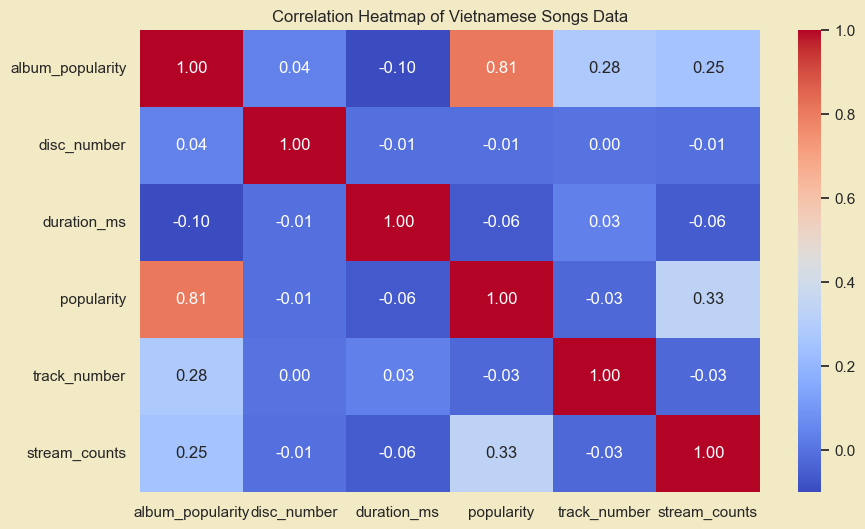

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
numerical = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Vietnamese Songs Data')
plt.show()

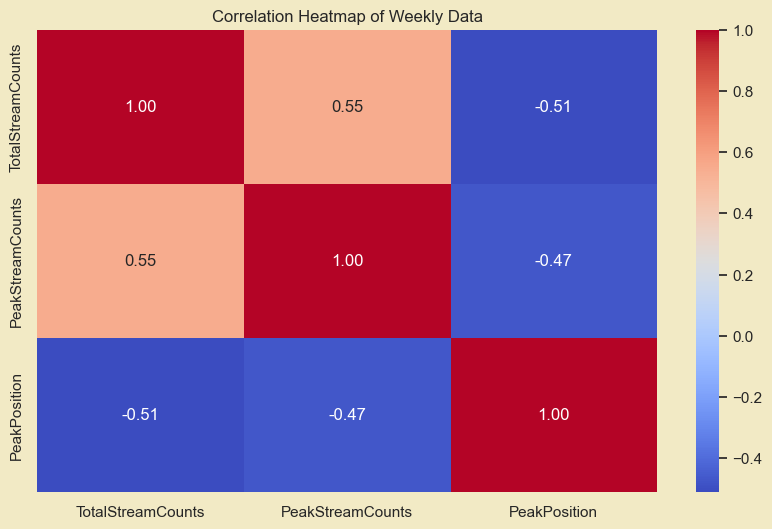

In [14]:
numerical = weekly.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Weekly Data')
plt.show()


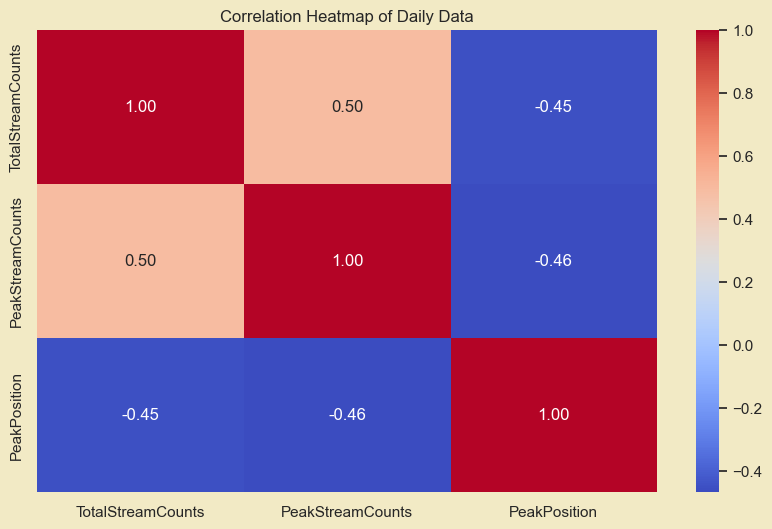

In [15]:
numerical = daily.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Daily Data')
plt.show()

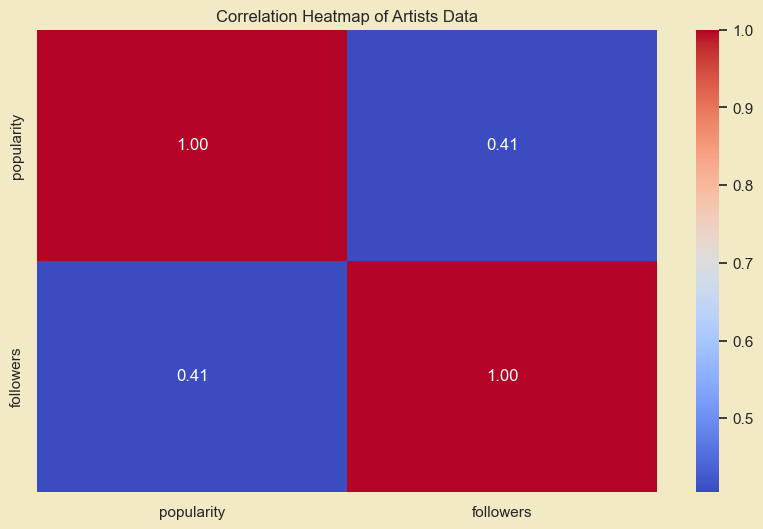

In [16]:
numerical = artists.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Artists Data')
plt.show()

In [17]:
import statsmodels.api as sm
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
y = data['stream_counts']
X = data.select_dtypes(include=[np.number]).drop(columns=['stream_counts'])
X = sm.add_constant(X)  # Add a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          stream_counts   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sun, 11 May 2025   Prob (F-statistic):          6.49e-123
Time:                        15:48:04   Log-Likelihood:                -86942.
No. Observations:                4817   AIC:                         1.739e+05
Df Residuals:                    4811   BIC:                         1.739e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.758e+06   4.14e+06  

In [18]:
y = data['popularity']
X = data.select_dtypes(include=[np.number]).drop(columns=['popularity'])
X = sm.add_constant(X)  # Add a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     2699.
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        15:48:04   Log-Likelihood:                -16501.
No. Observations:                4817   AIC:                         3.301e+04
Df Residuals:                    4811   BIC:                         3.305e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               17.2967      1.828  

In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/vietnamese_only_songs_clean.csv')

# Plot the genre distribution
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
def categorical_columns_plot(df, column_name, split_values=True, n_top=10, palette="magma", title='', xlabel = '', ylabel = ''):
    if split_values:
        all_values = df[column_name].fillna('')
        
        all_values = all_values.explode()
        all_values = all_values[all_values != '']
        
        unique_values = all_values.value_counts()
    else:
        unique_values = df[column_name].value_counts()
    
    plt.figure(figsize=(12, 6))
    plot_data = unique_values.head(n_top)
    
    colors = sns.color_palette(palette, min(len(plot_data), 10))
    
    plt.barh(y=range(len(plot_data)), width=plot_data.values, color=colors, edgecolor='black', linewidth=1.5)
    plt.yticks(range(len(plot_data)), plot_data.index)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

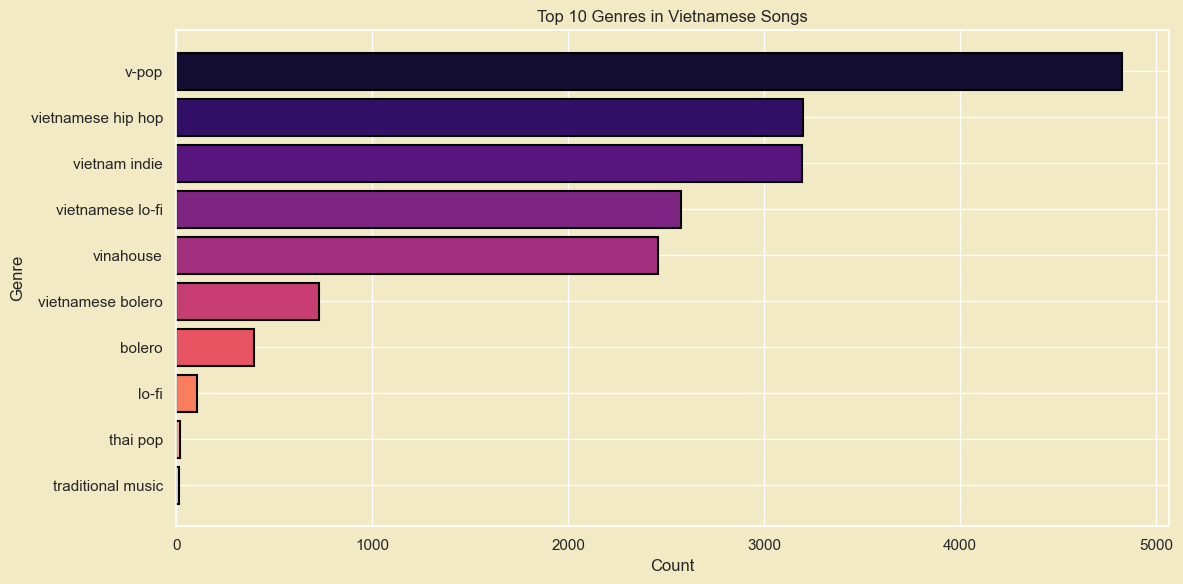

In [21]:
import ast

# Convert string representations of lists into actual lists
data['genres'] = data['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# Now call the function
categorical_columns_plot(data, 'genres', split_values=True, n_top=10, palette="magma", title='Top 10 Genres in Vietnamese Songs', xlabel='Count', ylabel='Genre')

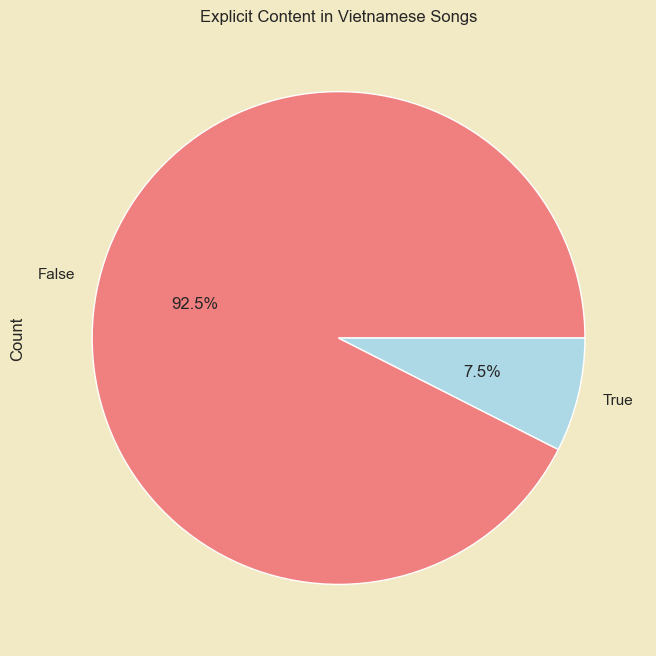

In [22]:
def pie_plot(df, column_name, colors = ['lightcoral','lightblue', 'lightgreen'], title = '', ylabel = ''):
    plt.figure(figsize=(8,8))
    df[column_name].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
# Plot the pie chart for the 'explicit' column
pie_plot(data, 'explicit', colors = ['lightcoral','lightblue'], title = 'Explicit Content in Vietnamese Songs', ylabel = 'Count')

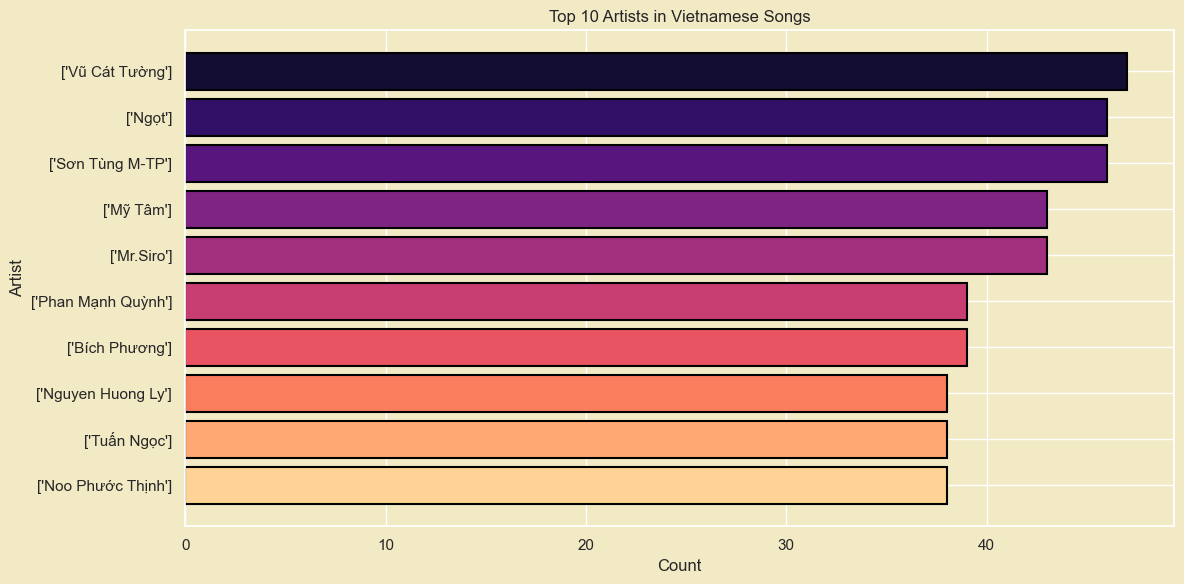

In [23]:
# Plot the bar chart for artists
categorical_columns_plot(data, 'artists', split_values=True, n_top=10, palette="magma", title='Top 10 Artists in Vietnamese Songs', xlabel='Count', ylabel='Artist')

Text(0.5, 0.98, 'Distribution of Numerical Features in Vietnamese Songs Data')

<Figure size 1000x600 with 0 Axes>

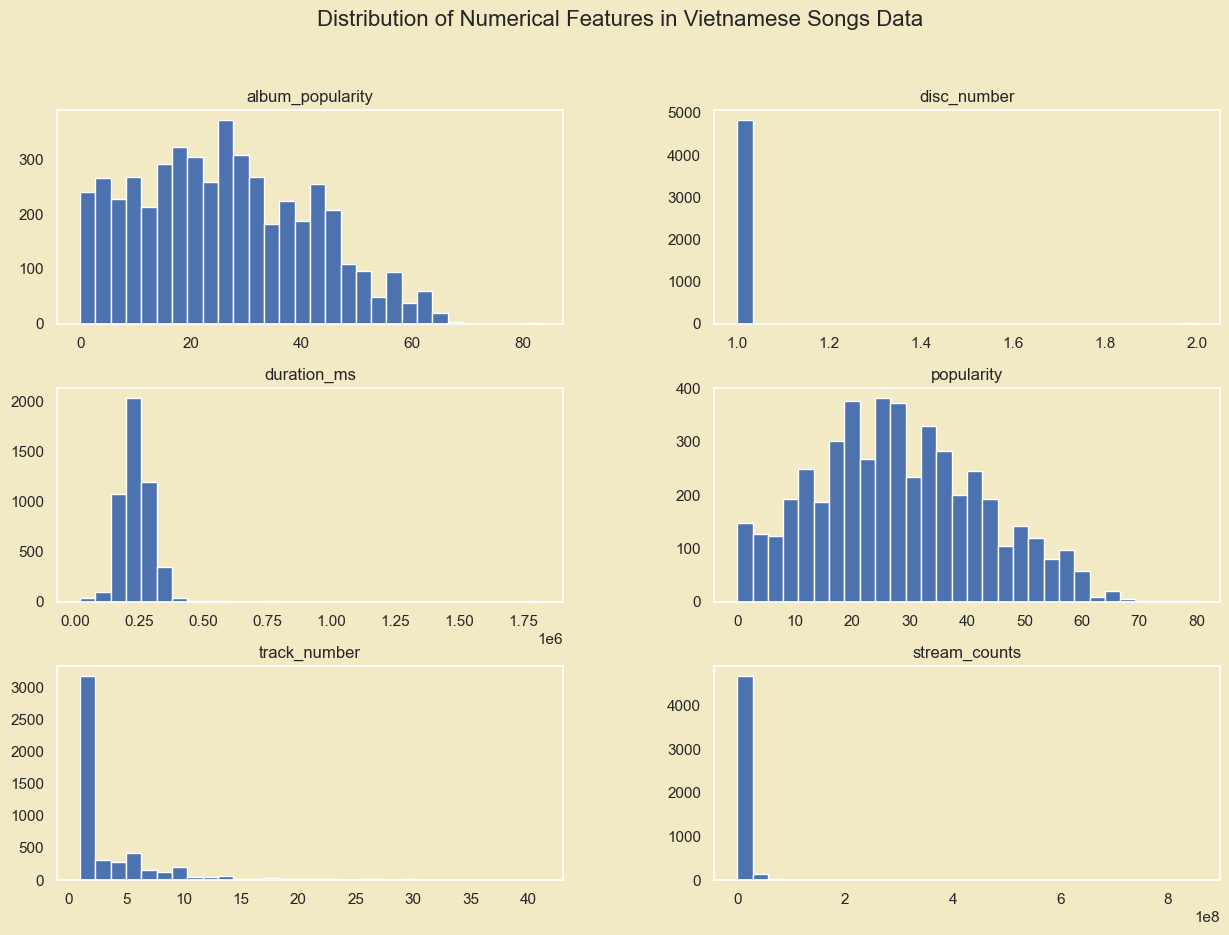

In [24]:
numerical = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
numerical.hist(bins=30, figsize=(15, 10), grid=False)
plt.suptitle('Distribution of Numerical Features in Vietnamese Songs Data', fontsize=16)

<Axes: >

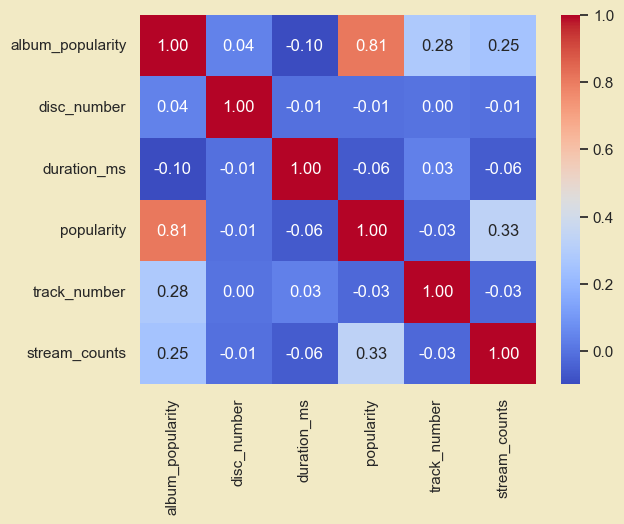

In [25]:
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f')